# Prosper Loan Data Exploration

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) to understand the dataset's variables.

The main purpose of this analysis is mainly to study the features that affect the borrower’s  interest rate, the factors affect a loan’s outcome status, and to discover new patterns and relationships in this dataset, some of the questions that we will be answering through out this analysis are the following:

- How the values of Borrower's Rate are distributed?
- How the values of Loan Status are distributed?
- How the values of Employment Status are distributed?
- How the values of Occupation are distributed?
- How the values of Loan term are distributed?
- How the values of Recommendations are distributed?
- How the values of Investors are distributed?
- How the values of Stated Monthly Income are distributed?
- What type of relationship there's between Loan Date and Loan Amount?
- What type of relationship there's between Loan Status and Prosper Rating?
- What type of relationship there's between Loan Status with Listing Category?
- What type of relationship there's between BorrowerRate and Loan Amount?
- What type of relationship there's between Recommendations and Borrowers Rate?
- What type of relationship there's between Prosper Rating and Employment Status?
- What is the relationship between BorrowerRate, Recommendation and Employment Status?

# Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

We can clearly see that this dataset contains 81 columns and 113937 entries.

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
77251,F5F23535910592714129073,546958,2011-12-27 11:52:41.957000000,NaN,36,Completed,2012-04-29 00:00:00,0.28974,0.2511,0.2411,...,-6.31,0.00,0.00,0.00,0.0,1.0,0,0,0.0,7
57173,71B93414661691651776D14,291327,2008-03-10 16:40:26.913000000,A,36,Completed,2011-02-08 00:00:00,0.11394,0.1000,0.0900,...,-48.42,0.00,0.00,0.00,0.0,1.0,0,0,0.0,91
49077,B2D035812093556068BBDC5,804644,2013-06-11 12:19:45.353000000,NaN,60,Current,NaN,0.20081,0.1769,0.1669,...,-51.53,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
92,0FE433661215082408720F0,22591,2006-07-02 11:05:02.857000000,AA,36,Completed,2007-03-01 00:00:00,0.08292,0.0755,0.0705,...,-6.73,0.00,0.00,0.00,0.0,1.0,0,0,0.0,21
50954,1F5D3589219255893095454,893057,2013-09-11 09:45:41.333000000,NaN,60,Completed,2013-12-16 00:00:00,0.25625,0.2310,0.2210,...,-29.99,0.00,0.00,0.00,0.0,1.0,0,0,0.0,74
68513,06A13599518623739EB5EA4,1078051,2014-01-03 08:42:12.803000000,NaN,36,Current,NaN,0.09030,0.0769,0.0669,...,-10.38,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
41304,DDFB33925330452439AC7A3,153129,2007-06-16 11:27:33.143000000,C,36,Chargedoff,2010-01-22 00:00:00,0.19730,0.1900,0.1800,...,-39.72,-32.64,1168.41,1168.41,0.0,1.0,0,0,0.0,39
35810,83E03571246144925BC7C41,720674,2013-02-28 18:09:19.540000000,NaN,60,Completed,2014-01-10 00:00:00,0.20593,0.1819,0.1719,...,-79.25,0.00,0.00,0.00,0.0,1.0,0,0,0.0,110
23508,056E3579284362265CC5326,791715,2013-05-29 00:19:04.550000000,NaN,60,Past Due (1-15 days),NaN,0.24282,0.2179,0.2079,...,-66.88,0.00,0.00,0.00,0.0,1.0,0,0,0.0,94
14585,0FA73598403727856AD618E,1115105,2014-01-02 20:28:33.793000000,NaN,60,Current,NaN,0.20347,0.1795,0.1695,...,-21.23,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1


According to the questions set above, here are the variables that I will be needing all along my analysis.

In [7]:
cols =  [
    'Term', 'LoanStatus', 'Occupation', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors', 'PercentFunded', 'MonthlyLoanPayment'
]

In [8]:
df = df[cols]

In [9]:
df.reset_index(drop=True)

,Term,LoanStatus,Occupation,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors,PercentFunded,MonthlyLoanPayment
0,36,Completed,Other,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258,1.0,330.43
1,36,Current,Professional,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1,1.0,318.93
2,36,Completed,Other,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41,1.0,123.32
3,36,Current,Skilled Labor,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,0,158,1.0,321.45
4,36,Current,Executive,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20,1.0,563.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,Current,Food Service Management,0.1864,C,1,Employed,7.0,4333.333333,NaN,10000,2013-04-22 00:00:00,0,1,1.0,364.74
113933,36,FinalPaymentInProgress,Professional,0.1110,A,7,Employed,4.0,8041.666667,3.0,2000,2011-11-07 00:00:00,0,22,1.0,65.57
113934,60,Current,Other,0.2150,D,1,Employed,0.0,2875.000000,NaN,10000,2013-12-23 00:00:00,0,119,1.0,273.35
113935,60,Completed,Food Service,0.2605,C,2,Full-time,0.0,3875.000000,1.0,15000,2011-11-21 00:00:00,0,274,1.0,449.55


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   Occupation                 110349 non-null  object 
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   DelinquenciesLast7Years    112947 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   TotalProsperLoans          22085 non-null   float64
 10  LoanOriginalAmount         113937 non-null  int64  
 11  LoanOriginationDate        113937 non-null  object 
 12  Recommendations            113937 non-null  int64  
 13  Investors                  11

**Insights**
- We can clearly see that we have a considerable amount of missing values in the `ProsperRating` column. Which is something that we should deal with since this variable is an important one for our analysis.
- `LoanOriginationDate` has an object datatype. So we need to convert it to datetime datatype.
- `TotalProsperLoans` has a lot of missing values. We can replace all `NaN` with zeros (from the data dictionnary we have: number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans)

In [11]:
df = df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [12]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [13]:
df['TotalProsperLoans'] = df['TotalProsperLoans'].fillna(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   Occupation                 83520 non-null  object        
 4   BorrowerRate               84853 non-null  float64       
 5   ProsperRating (Alpha)      84853 non-null  object        
 6   ListingCategory (numeric)  84853 non-null  int64         
 7   EmploymentStatus           84853 non-null  object        
 8   DelinquenciesLast7Years    84853 non-null  float64       
 9   StatedMonthlyIncome        84853 non-null  float64       
 10  TotalProsperLoans          84853 non-null  float64       
 11  LoanOriginalAmount         84853 non-null  int64         
 12  Loan

Now our data seems pretty ready to work with 😃! Let's dive in.

### What is the structure of your dataset?

The dataset that I will be working with has a total of 84853 loans entries, and 15 properties. It's tidy and ready to work with!



### What are the main features of interest in your dataset?

In this Analysis, my main focus is to study the factors affect a loan’s outcome status, the features that affect the borrower’s APR or interest rate, and to discover new patterns and relationships in this dataset (concerning borrowers).



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Since I will be studying the factors that affect a loan's outcome status, my guess is that I would need to study `LoanOriginalAmount`, `Stated Monthly Income`, `Recommendations` and more. For the borrower's APR, my guess is to study `Recommendations`, `Investors`, `LoanOriginalAmount` mainly. Since I am seeking to unlock new patterns within this dataset, I will be using other features as well.

## Univariate Exploration

### Borrower's Rate

Let's have a glance at the Borrower's Rate.

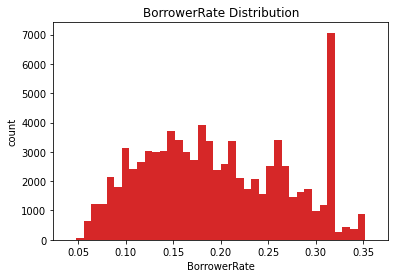

In [15]:
base_color = sns.color_palette()[3]
plt.hist(data=df, x="BorrowerRate", bins=40, color=base_color);
plt.title('BorrowerRate Distribution');
plt.xlabel('BorrowerRate');
plt.ylabel('count');

**Insights**
* We can clearly see that rates are from 0.05 to 0.35 at most.
* The distribution of the BorrowerRate is quite strange, but we can say that most borrowers have a rate of approximatively 0.32.

###  Loan status

Let's have a glance at the Loan Status in our Dataset

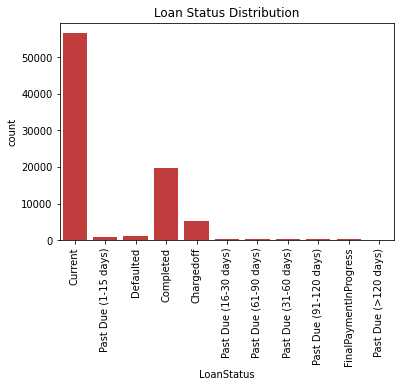

In [16]:
base_color = sns.color_palette()[3]
plt.xticks(rotation=90)
fig = sns.countplot(data = df, x = 'LoanStatus', color = base_color);
plt.title('Loan Status Distribution');

**Insights**
* We can clearly see that most Loan status are `Current`.
* We have several Past due loans depending on the length of payment delay. E.g Past Due (16-30 days).

### Employment Status

Now, let's have a quick glance at the Employment Status.

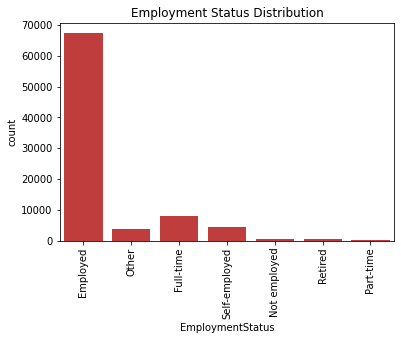

In [17]:
base_color = sns.color_palette()[3]
sns.countplot(data = df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);
plt.title('Employment Status Distribution');

**Insights**
* We can state that the vast majority of borrowers are actually `Employed`. 
* We can notice that rest of categories represent a small portion of borrowers (full-time has the highest frequence among these).

### Occupation

Now let's have a glance at the top 10 occupations in our Dataset.

Text(0.5, 1.0, 'Top 10 Occupations Count')

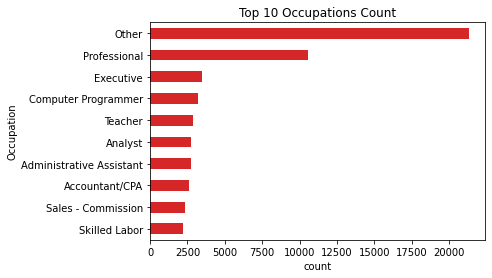

In [18]:
df['Occupation'].value_counts()[9::-1].plot(kind='barh', color= base_color);
plt.xlabel('count')
plt.ylabel('Occupation')
plt.title('Top 10 Occupations Count')

**Insights**
* We can see that the most frequent category in the `Occupation` column is Other. 
* Since we don't have much information about what `Other` category includes. We say that Professionals, Executives, and Computer programmers are on the top of the list.

### Term

Now let's have a glance at the number of term variable.

In [19]:
df['Term'].value_counts()

36    58695
60    24545
12     1613
Name: Term, dtype: int64

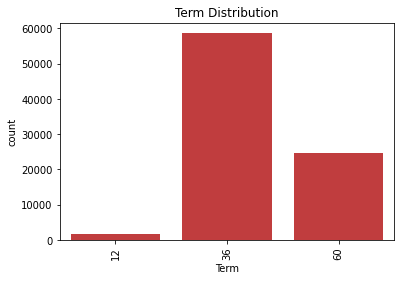

In [20]:
sns.countplot(data = df, x = 'Term', color = base_color);
plt.xticks(rotation = 90);
plt.title('Term Distribution');

**Insights**
* We can clearly see that most terms have 36 months.
* We can clearly see that very few terms have 12 months (comparing to other terms).

### Recommendations

Now let's have a glance at the number of recommendations the borrower had at the time the listing was created.

In [21]:
df['Recommendations'].value_counts()

0     83637
1      1030
2       156
3        22
5         2
4         2
18        2
19        1
9         1
Name: Recommendations, dtype: int64

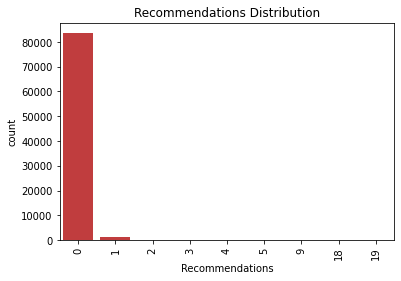

In [22]:
sns.countplot(data = df, x = 'Recommendations', color = base_color);
plt.xticks(rotation = 90);
plt.title('Recommendations Distribution');

**Insights**
* We can clearly see that most borrowers had no recommendation at the time the listing was created.
* Few borrowers had from 1 to 2 recommendations.
* Very few (ignorable) borrowers had 3 or more recommendations.

### Investors

Let's have a glance at the distribution of investors.

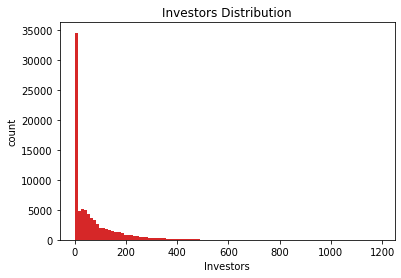

In [23]:
plt.hist(data=df, x="Investors", bins=100, color=base_color);
plt.title('Investors Distribution');
plt.xlabel('Investors');
plt.ylabel('count');

**Insights** 
- The distribution of Investors is highly skewed to the right. Which means we do have few loans with a lot of investors.

### Stated Monthly Income

Now let's have a glance at the stated Monthly income

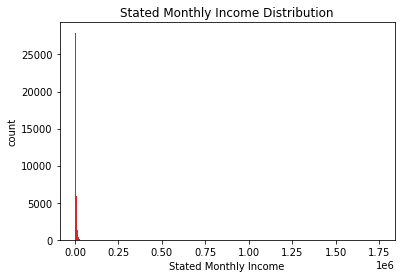

In [24]:
plt.hist(data=df, x='StatedMonthlyIncome', bins=800, color=base_color);
plt.title('Stated Monthly Income Distribution');
plt.xlabel('Stated Monthly Income');
plt.ylabel('count');

**Insights** 
- The distribution of Stated Monthly Income is highly skewed to the right. In order to have better insights, we need to change the interval of study.

In [25]:
income_std = df['StatedMonthlyIncome'].std()
income_mean = df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3

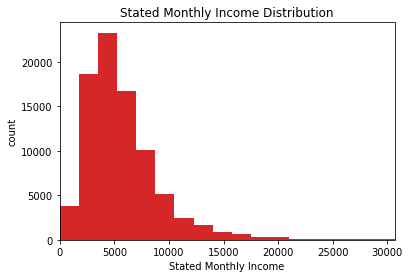

In [26]:
plt.hist(data=df, x='StatedMonthlyIncome', bins=1000, color = base_color);
plt.xlim(0, boundary);
plt.title('Stated Monthly Income Distribution');
plt.xlabel('Stated Monthly Income');
plt.ylabel('count');

**Insights**
* After changing the interval of study, we still see that the distribution of monthly income is skewed to the right with a mode of approximatively 5000 (most borrowers have stated a monthly income of 5000)

### Discuss the distribution of some variables of interest. Were there any unusual points? Did you need to perform any transformations?
* The distribution of the BorrowerRate is quite strange, but we can say that most borrowers have a rate of approximatively 0.32.
* The distribution of monthly stated income is skewed to the right. Which means that few borrowers tend to state a monthly income which is higher than 5000.
* The distribution of Investors is also skewed to the right. 
* The vast majority of borrowers are employed.
* The vast majority of loans in theis Dataset are current loans.
* The vast majority of loans aren't recommended (0 recommendation).
* Most terms have 36 months (3 years).
* Professionals, Executives, and Computer programmers are on the top of the list.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
* Up to this moment new patterns are getting unlocked! However we don't have very strange distributions.
* I didn't adjust the data or change its form. By selecting the above variables, the data is already tidy, however I had to do some cleaning before working with it.

## Bivariate Exploration

### Preparing the data for Visualization

#### Listing Category from numeric to category

In [27]:
df['ListingCategory (numeric)'].value_counts()

1     53180
7      9218
2      6801
3      5298
6      2237
13     1996
15     1522
18      885
14      876
20      771
19      768
16      304
5       274
11      217
8       199
10       91
9        85
12       59
17       52
0        20
Name: ListingCategory (numeric), dtype: int64

The Listing Category is set up as numeric, but we can get the categories from the [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). Since we have a lot of categories and most of them have very low frequencies, so It would be a good idea to reduce the number of categories by grouping all the categories with low frequencies in a brand new category `Other`.

In [28]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def listing_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df['ListingCategory (category)'] = df.apply(listing_categorie, axis=1)
df['ListingCategory (category)'].value_counts()

Debt Consolidation    53180
Other                 17337
Home Improvement       6801
Business               5298
Auto                   2237
Name: ListingCategory (category), dtype: int64

#### Loan status

Let's group loan status into categories for better visualizations

In [29]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [30]:
def change_to_default(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    elif row['LoanStatus'] == 'Past Due (1-15 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (31-60 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (61-90 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (91-120 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (16-30 days)':
        return 'Past Due'
    elif row['LoanStatus'] == 'Past Due (>120 days)':
        return 'Past Due'
    else:
        return row['LoanStatus']
    
df['LoanStatus (Modified)'] = df.apply(change_to_default, axis=1)
df['LoanStatus (Modified)'].value_counts()

Current                   56576
Completed                 19664
Defaulted                  6341
Past Due                   2067
FinalPaymentInProgress      205
Name: LoanStatus (Modified), dtype: int64

### Loan Date  and Loan Amount

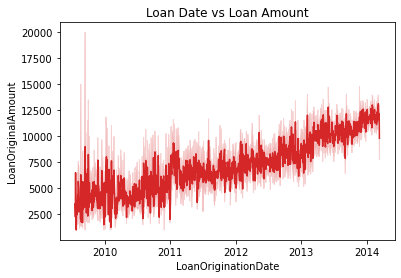

In [31]:
sns.lineplot(data = df, x="LoanOriginationDate", y='LoanOriginalAmount', color = base_color)
plt.title('Loan Date vs Loan Amount');

**Insights**
* We can say that as the loan date increases, the Loan Amount increases. However we do have some noise here and there.

### Loan Status  and Prosper Rating

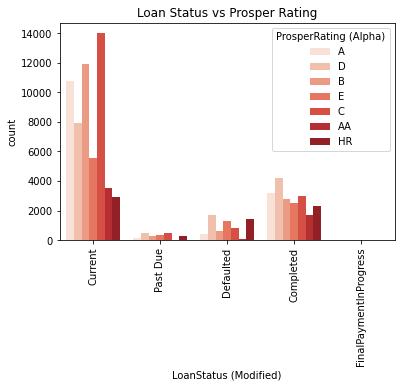

In [32]:
sns.countplot(data = df, x = 'LoanStatus (Modified)', hue = 'ProsperRating (Alpha)', palette = 'Reds');
plt.xticks(rotation = 90);
plt.title('Loan Status vs Prosper Rating');

**Insights**
* The most frequent rating among Current loans is actually `C`. Whereas the least frequent one is `HR`.
* The most frequent rating among Completed loans is `D`. Whereas the least frequent one is `AA`.
* The most frequent rating among Defaulted loans is also`D`. Whereas the least frequent one is `AA`.
* The most frequent rating among Past Due loans is also`D`. Whereas the least frequent one is `AA`.
* We can clearly see that loans with Current status are the ones with most `A` prosper rating.

###  Loan Status with Listing Category

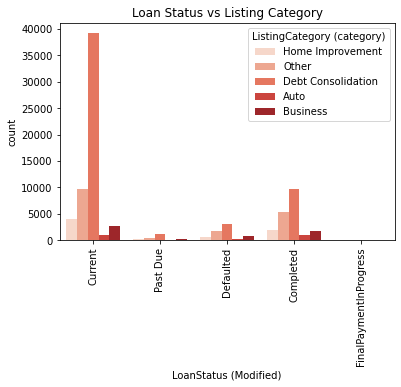

In [33]:
sns.countplot(data = df, x = 'LoanStatus (Modified)', hue = 'ListingCategory (category)', palette = 'Reds');
plt.xticks(rotation = 90);
plt.title('Loan Status vs Listing Category');

**Insights**
* We can clearly see that the `Debt Consolidation` have the most frequency among all of them all other listing categories in all loans status.

### BorrowerRate and Loan Amount

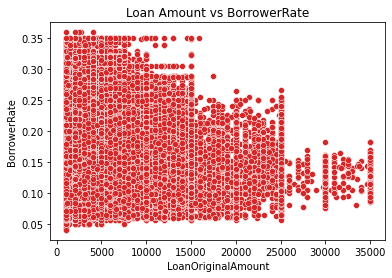

In [34]:
sns.scatterplot(data = df, x="LoanOriginalAmount", y="BorrowerRate", color=  base_color);
plt.title('Loan Amount vs BorrowerRate');

**Insights**
* From the scatter plot above, we can see that when the `LoanOriginalAmount` increases, the `BorrowerRate` decreases.

### Term and Borrowers Rate

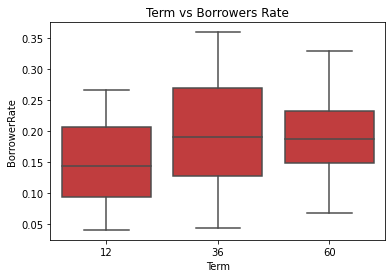

In [35]:
sns.boxplot(data = df, x = 'Term', y = 'BorrowerRate', color = base_color);
plt.title('Term vs Borrowers Rate');

**Insights**
* We can clearly see that borrowers seem to have more interests in average in loans with a term of 36 months or 3 years.

### Recommendations and Borrowers Rate

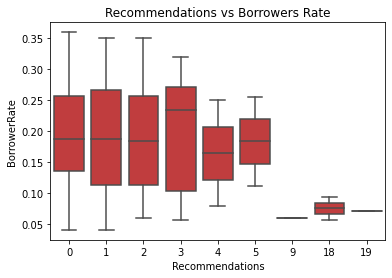

In [36]:
sns.boxplot(data = df, x = 'Recommendations', y = 'BorrowerRate', color = base_color);
plt.title('Recommendations vs Borrowers Rate');

**Insights**
* We can clearly see that borrowers who had 3 recommendations at the time the listing was created have the highest mean of interest rate among all others.
* Even though some borrowers have more than 9 recommendations (9, 18, and 19), they don't have a high interest rate.

### Prosper Rating and Employment Status

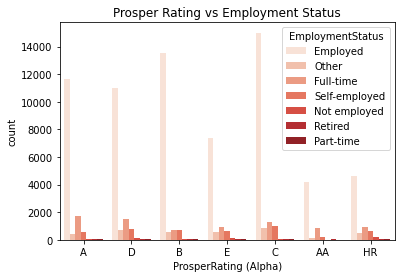

In [37]:
sns.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Reds');
plt.title('Prosper Rating vs Employment Status');

**Insights**
* We can notice that lower ratings seem to have greater proportions of individuals with Employment status of: `Not Employed`, `Self-employed`, `Retired` and `Part-Time`. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
* **LoanOriginalDate vs Loan Amount**: as the loan date increases, the Loan Amount increases.
* **BorrowerRate vs Loan Amount**: when the LoanOriginalAmount increases, the BorrowerRate decreases.
* **Term vs BorrowerRate**: We can clearly see that borrowers seem to have more interests in average in loans with a term of 36 months or 3 years.
* **Loan Status vs Prosper Rating**: we can state the following:
    * The most frequent rating among Current loans is actually `C`. Whereas the least frequent one is `HR`.
    * The most frequent rating among Completed loans is `D`. Whereas the least frequent one is `AA`.
    * The most frequent rating among Defaulted loans is also`D`. Whereas the least frequent one is `AA`.
    * The most frequent rating among Past Due loans is also`D`. Whereas the least frequent one is `AA`.
    * We can clearly see that loans with Current status are the ones with most `A` prosper rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
* **Prosper Rating vs Employment Status**: individuals with lower ratings tend to be `Not employed`, `Self-employed`, `Retired`, or `Part-time`.

## Multivariate Exploration

### Relationships between EmploymentStatus, BorrowerRate and Recommendations

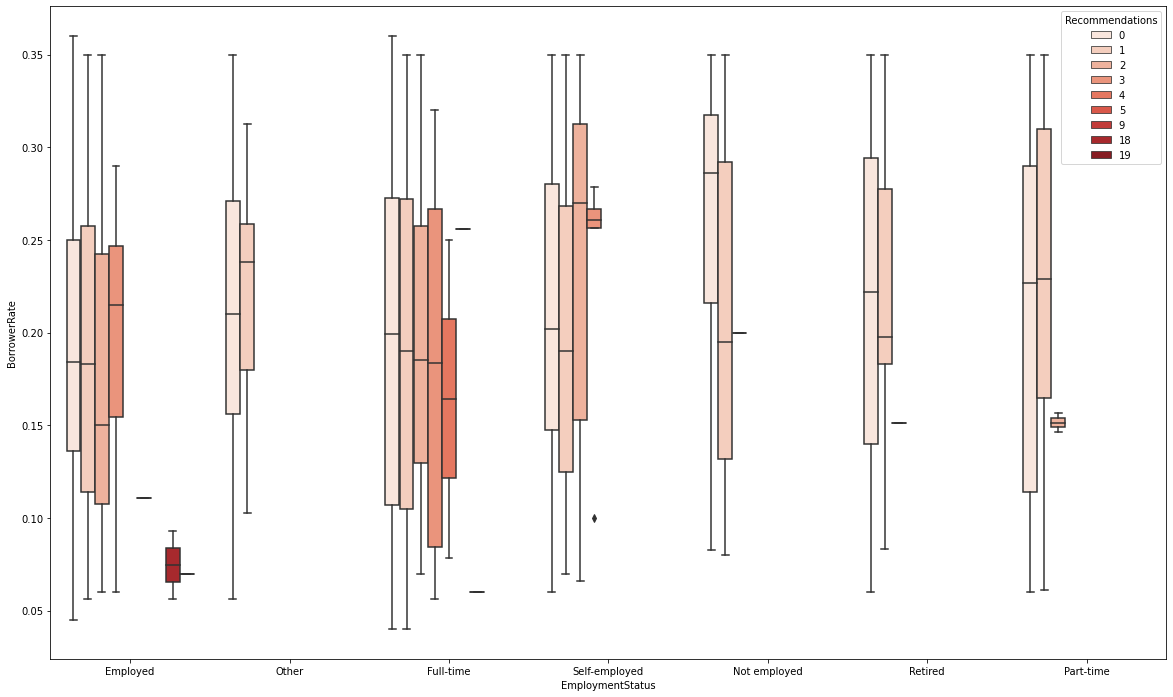

In [54]:
plt.figure(figsize=[20,12])
sns.boxplot(x = 'EmploymentStatus', y="BorrowerRate", hue = 'Recommendations',
              data = df, palette = 'Reds');

**Insights**
* We can clearly see that `Not Employed`, `Retired` and `Part-time` tend to have from zero to one recommendation, and tend to have a decent borrowerRate.
* We can clearly see that borrowers with `Full-time` positions tend to have more recommendations, maybe due to networking (after them we do have `Employed`, and `Self-employed`), and they tend to have a decent borrowerRate as well.
* We can see an Employed borrower who got 19 recommendations has a low borrow rate.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
* From this part, we can state that that `Not Employed`, `Retired` and `Part-time` tend to have from zero to one recommendation, and tend to have a decent borrowerRate. We can also state that borrowers with `Full-time` positions tend to have more recommendations, maybe due to networking (after them we do have `Employed`, and `Self-employed`), and they tend to have a decent borrowerRate as well. We can see an Employed borrower who got 19 recommendations has a low borrow rate.

## Were there any interesting or surprising interactions between features?
* Recommendations don't really affect the borrower's rate.